In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:

# This is the path where you want to search
path = "/home/julius/Documents/Julius_03_x_auswertung"

# this is the extension you want to detect
extension = '.csv'
all_files = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if os.path.splitext(file_name)[-1] == extension:
            file_name_path = os.path.join(root, file_name)
            all_files.append(file_name_path)  # This is the full path of the filt

all_files = sorted(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

master_df = pd.concat(li, axis=0, ignore_index=True)

master_df.head(10)

,Subsample,File,Scene,Object,Max,Min,Median,Mean,Std,Var
0,10,depth_000.png,001_standing_coated,canister,406.0,0.0,17.0,58.268998,100.877906,10176.351947
1,10,depth_000.png,001_standing_coated,small_bottle,NaN,NaN,NaN,NaN,NaN,NaN
2,10,depth_000.png,001_standing_coated,medium_bottle,757.0,0.0,26.0,51.467119,94.278780,8888.488346
3,10,depth_000.png,001_standing_coated,large_bottle,472.0,0.0,8.0,53.588611,72.684847,5283.086952
4,10,depth_001.png,001_standing_coated,canister,242.0,0.0,11.0,14.449796,20.141010,405.660289
5,10,depth_001.png,001_standing_coated,small_bottle,258.0,0.0,10.0,72.630111,92.554413,8566.319315
6,10,depth_001.png,001_standing_coated,medium_bottle,517.0,0.0,18.0,43.245498,59.422004,3530.974505
7,10,depth_001.png,001_standing_coated,large_bottle,509.0,0.0,7.0,15.436519,20.953587,439.052819
8,10,depth_002.png,001_standing_coated,canister,426.0,0.0,12.0,30.289318,62.692147,3930.305254
9,10,depth_002.png,001_standing_coated,small_bottle,464.0,0.0,8.0,9.714692,13.824743,191.123521


In [ ]:
# # This is the path_sensor where you want to search
# path_sensor = "/home/julius/Documents/Julius_03"

# # this is the extension you want to detect
# extension1 = 'ONLY_NON_ZERO_COMP.csv'
# extension2 = 'sensor.csv'
# all_files = []
# for root, dirs_list, files_list in os.walk(path_sensor):
#     for file_name in files_list:
#         # if os.path.splitext(file_name)[-1] == extension:
#         #     file_name_path = os.path.join(root, file_name)
#         #     all_files.append(file_name_path)  # This is the full path of the filt
#         if extension1 in file_name:
#             file_name_path = os.path.join(root, file_name)
#             all_files.append(file_name_path)  # This is the full path of the filt

#         elif extension2 in file_name:

# all_files = sorted(all_files)
# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=0, header=0)
#     li.append(df)

# sensor_only_df = pd.concat(li, axis=0, ignore_index=True)

# sensor_only_df.head(10)

In [3]:
# This is the path_sensor where you want to search
path_sensor = "/home/julius/Documents/Julius_03"

# this is the extension you want to detect
extension1 = 'ONLY_NON_ZERO_COMP.csv'
extension2 = 'sensor.csv'
all_files_only_non_zero = []
all_files_sensor = []
for root, dirs_list, files_list in os.walk(path_sensor):
    for file_name in files_list:
        # if os.path.splitext(file_name)[-1] == extension:
        #     file_name_path = os.path.join(root, file_name)
        #     all_files_only_non_zero.append(file_name_path)  # This is the full path of the filt
        if extension1 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_only_non_zero.append(file_name_path)  # This is the full path of the filt
            
        elif extension2 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_sensor.append(file_name_path)  # This is the full path of the filt

all_files_only_non_zero = sorted(all_files_only_non_zero)
all_files_sensor = sorted(all_files_sensor)

li = []
for filename in all_files_only_non_zero:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

sensor_only_non_zero_df = pd.concat(li, axis=0, ignore_index=True)

sensor_only_non_zero_df.head(10)

li = []
for filename in all_files_sensor:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

sensor_only_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
data = master_df.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
scenes = list(data.index.get_level_values('Scene').unique())
subsamples = list(data.index.get_level_values('Subsample').unique())

sensor_only_data = sensor_only_df.groupby(["Scene"])['Mean'].mean().to_frame()

sensor_only_data

,Mean
Scene,
001_standing_coated,98.120942
002_lying_coated,76.650217
003_standing_liquid,273.141551
004_lying_liquid,216.391998
005_standing_empty,277.517129
006_lying_empty,217.540792


In [6]:
sensor_only_non_zero_data = sensor_only_non_zero_df.groupby(["Scene"])['Mean'].mean().to_frame()
sensor_only_non_zero_data

,Mean
Scene,
001_standing_coated,14.573023
002_lying_coated,9.458331
003_standing_liquid,37.914424
004_lying_liquid,25.484617
005_standing_empty,46.563594
006_lying_empty,28.693751


Rectangle(xy=(-0.4, 0), width=0.08, height=210.584, angle=0)
Rectangle(xy=(-0.32, 0), width=0.08, height=154.493, angle=0)
Rectangle(xy=(-0.24, 0), width=0.08, height=60.4414, angle=0)
Rectangle(xy=(-0.16, 0), width=0.08, height=36.8079, angle=0)
Rectangle(xy=(-0.08, 0), width=0.08, height=21.3121, angle=0)
Rectangle(xy=(-2.08167e-17, 0), width=0.08, height=15.8976, angle=0)
Rectangle(xy=(0.08, 0), width=0.08, height=15.0233, angle=0)
Rectangle(xy=(0.16, 0), width=0.08, height=15.5259, angle=0)
Rectangle(xy=(0.24, 0), width=0.08, height=14.3086, angle=0)
Rectangle(xy=(0.32, 0), width=0.08, height=13.2979, angle=0)


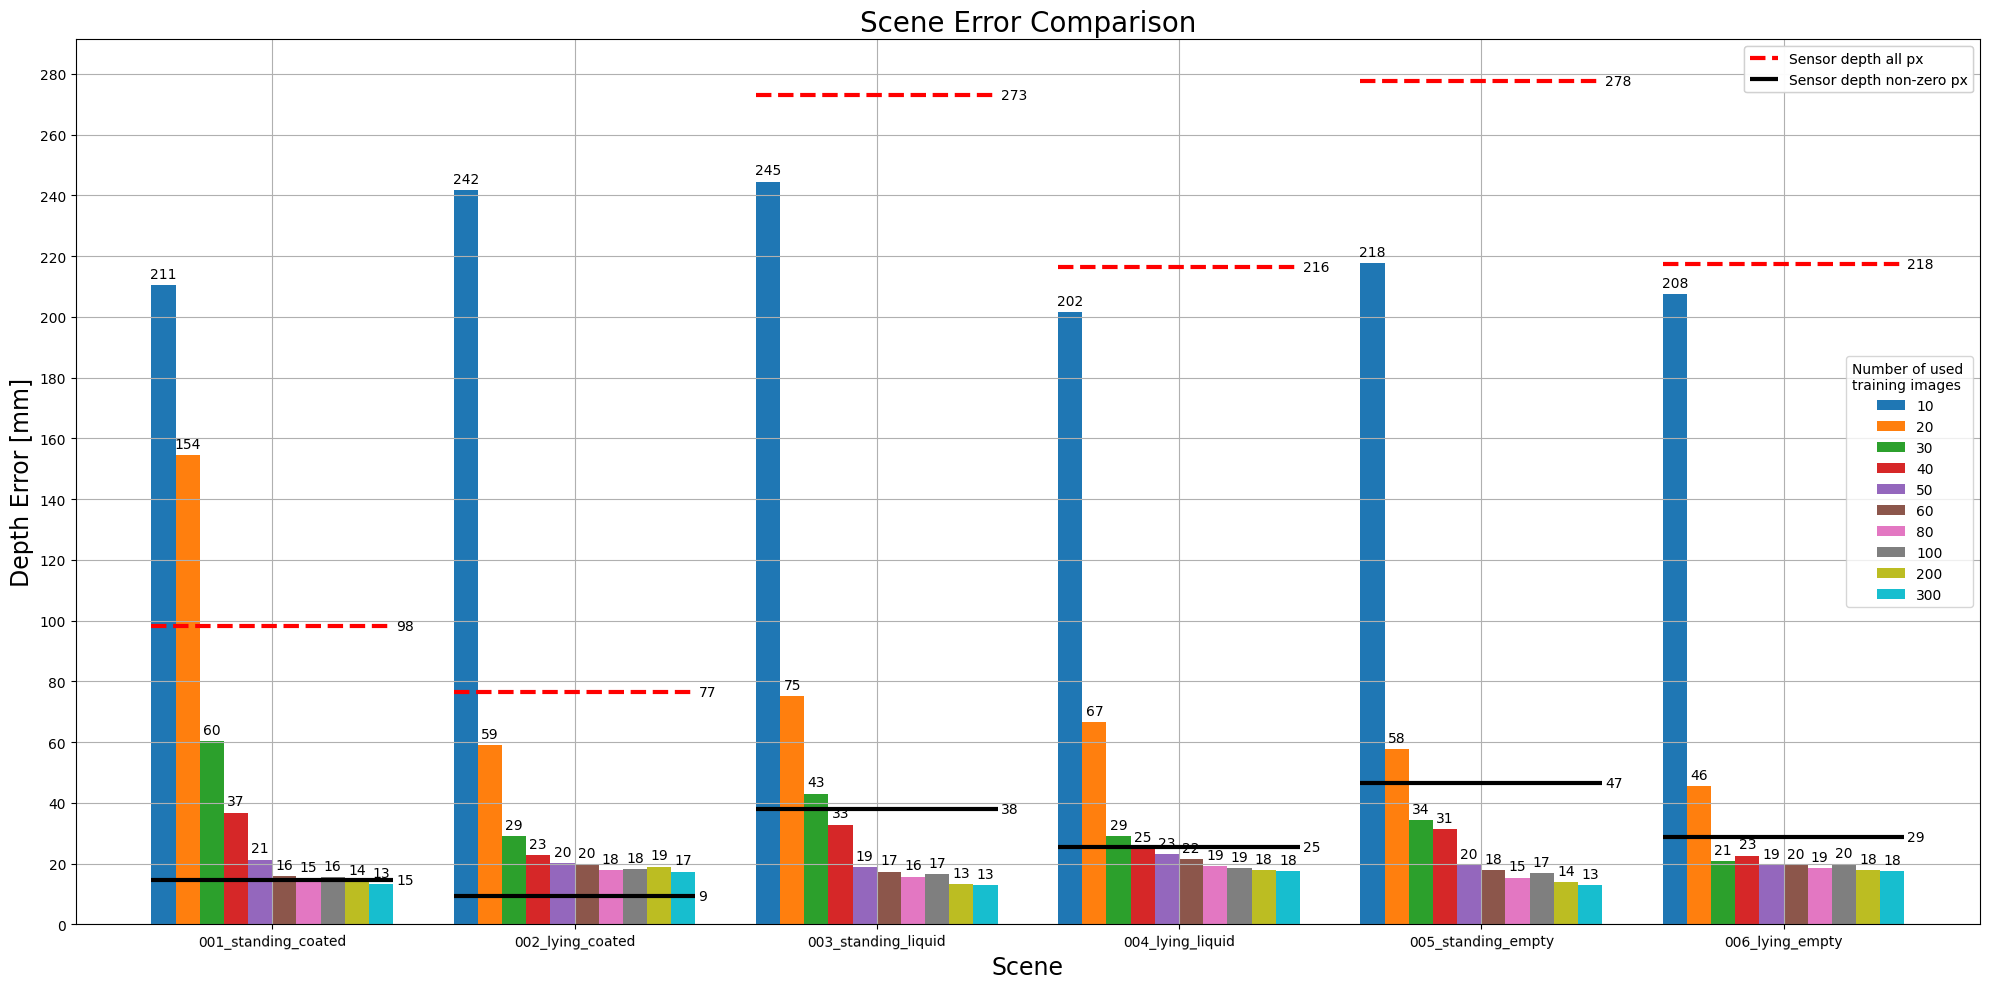

In [32]:

SMALL_SIZE = 10
MEDIUM_SIZE = 17
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


ax = data.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
for idx, c in enumerate(ax.containers):
    # set the bar label
    print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc='center right', title='Number of used \ntraining images')

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx+0.41,height, s= f'{height:.0f}', ha='left', va='center')

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx+0.41,height, s= f'{height:.0f}', ha='left', va='center')
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper right')

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene Error Comparison", fontsize=20)

plt.tight_layout()

#print(data.unstack())

In [ ]:


# plot lineplot for each scene
#fig, axs = plt.subplots(len(scenes), len(objects))
for scene in scenes:
    fig = plt.figure(figsize=(14, 7))
    df_scene = data.loc[scene]
    
    plt.bar(df_scene.index.get_level_values('Subsample'), df_scene['Mean'], label=scene)

    # set the legend
    plt.legend()

    # set the x and y labels
    plt.yticks(np.arange(0, 301, 50))
    plt.xticks([0,10,20,30,40,50,60,80,100,200,300])
    plt.xlabel('Number of used training images')
    plt.ylabel('Error [mm]')
    plt.grid()
    plt.title("Mean depth error per scene")

    # show the plot
plt.show()